# Implementation of MCP Neuron for AND and OR Function.

In [7]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  state_neuron = []
  for x1, x2 in zip(X1, X2):
      # Sum the inputs
      total_input = x1 + x2

      if total_input >= T:
          state_neuron.append(1)
      else:
          state_neuron.append(0)
  return state_neuron

In [8]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [9]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
    state_neuron = []  # Initialize the list to store the neuron states

    for x1, x2 in zip(X1, X2):
        total_input = x1 + x2

        if total_input >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)
    return state_neuron


In [10]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


#Question 1.
List out all the limitations of MCP - Neurons.

Answer: The limitations of MCP (McCulloch-Pitts) neurons are:

Binary Output: They only give answers of 0 or 1, which isn't how real neurons work since real neurons give a range of responses.

No Learning: They can't learn from experience. The weights (importance of inputs) are set in advance and don't change.

Simple Activation: They use a very simple on/off switch (threshold) for activation, which can't handle more complex situations.

Over-Simplified: They are too basic compared to real neurons, which are much more complex.

No Time Factor: They don't consider how things change over time, while real neurons can remember and adjust based on past activity.

Limited Power: They can't do complicated tasks, only basic logical operations like AND or OR.

Can't Handle Non-Linear Problems: They can't handle problems that involve more complex relationships, like predicting things with curves or patterns.

No Flexibility: They don't adjust to new data or situations, so they can’t generalize well.

Can't Handle Continuous Inputs: They only work with binary (0 or 1) inputs, not with numbers that vary smoothly.

Limited to Simple Logic: They are mainly used for basic logical operations, like in a truth table, so they can't solve complex problems like modern AI systems.

#Question 2:
Think if you can develop a logic to solve for XOR function using MCP Neuron.

In [11]:
def xor(A, B):
    if A == 1 or B == 1:
        output_1 = 1  # OR operation
    else:
        output_1 = 0

    if A != B:
        output_2 = 1  # XOR result
    else:
        output_2 = 0

    return output_2

# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (1735, 784)
Label vector shape: (1735,)


### Viewing the Dataset.

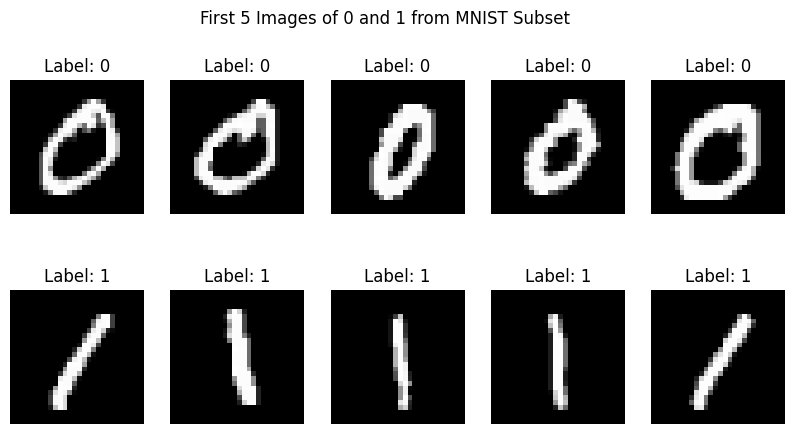

In [13]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [14]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [15]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############  # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [16]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    for epoch in range(epochs):
        correct_predictions = 0

        for i in range(len(X)):
            prediction = np.dot(X[i], weights) + bias
            prediction = 1 if prediction >= 0 else 0

            if prediction != y[i]:
                if y[i] == 1:
                    weights += learning_rate * X[i]
                    bias += learning_rate
                else:
                    weights -= learning_rate * X[i]
                    bias -= learning_rate

            if prediction == y[i]:
                correct_predictions += 1

        accuracy = correct_predictions / len(X)
        print(f'Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.4f}')

    return weights, bias, accuracy

## Training the Perceptron

In [17]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100, Accuracy: 0.9925
Epoch 2/100, Accuracy: 0.9983
Epoch 3/100, Accuracy: 0.9983
Epoch 4/100, Accuracy: 1.0000
Epoch 5/100, Accuracy: 1.0000
Epoch 6/100, Accuracy: 1.0000
Epoch 7/100, Accuracy: 1.0000
Epoch 8/100, Accuracy: 1.0000
Epoch 9/100, Accuracy: 1.0000
Epoch 10/100, Accuracy: 1.0000
Epoch 11/100, Accuracy: 1.0000
Epoch 12/100, Accuracy: 1.0000
Epoch 13/100, Accuracy: 1.0000
Epoch 14/100, Accuracy: 1.0000
Epoch 15/100, Accuracy: 1.0000
Epoch 16/100, Accuracy: 1.0000
Epoch 17/100, Accuracy: 1.0000
Epoch 18/100, Accuracy: 1.0000
Epoch 19/100, Accuracy: 1.0000
Epoch 20/100, Accuracy: 1.0000
Epoch 21/100, Accuracy: 1.0000
Epoch 22/100, Accuracy: 1.0000
Epoch 23/100, Accuracy: 1.0000
Epoch 24/100, Accuracy: 1.0000
Epoch 25/100, Accuracy: 1.0000
Epoch 26/100, Accuracy: 1.0000
Epoch 27/100, Accuracy: 1.0000
Epoch 28/100, Accuracy: 1.0000
Epoch 29/100, Accuracy: 1.0000
Epoch 30/100, Accuracy: 1.0000
Epoch 31/100, Accuracy: 1.0000
Epoch 32/100, Accuracy: 1.0000
Epoch 33/100, Acc

## Step 5: Visualize Misclassified Images

In [18]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


#Question3:
What does the weights array represent in this context?

Answer: The weights array represents the parameters that determine the importance of each input feature (pixel) in the decision-making process of the perceptron.


# Question 4:
Why are we initializing the weights to zero? What effect could this
have on the training process?

Answer: We initialize weights to zero to start with a neutral model, and it ensures that the updates during training are based on the errors. However, if weights are all zero, the model may take longer to converge or have slower learning in some cases.





#Question 5:
What is the purpose of the output = np.dot(X[i], weights) + bias line?

Answer: The purpose of the line output = np.dot(X[i], weights) + bias is to compute the weighted sum of the inputs (X[i]) by multiplying them with the corresponding weights, and then adding the bias. This result is used to determine the output of the perceptron, which is passed through the activation function to make a prediction.

#Question 6:
What happens when the prediction is wrong? How are the weights and
bias updated?

Answer: When the prediction is wrong, the weights and bias are updated to reduce the error. Specifically, the weights are adjusted using the formula:

Weight update: wi = wi + η(y - ŷ)xi
Bias update: b = b + η(y - ŷ)

Here, η is the learning rate, y is the true label, ŷ is the predicted label, and xi is the input feature. This update corrects the model’s parameters to improve future predictions.

#Question 7:
Why is the final accuracy important, and what do you expect it to be?

Answer: The final accuracy is important because it measures how well the perceptron model has learned to classify the data correctly. It reflects the model's overall performance. Ideally, we expect the accuracy to be high, as this indicates the model is making correct predictions on most of the data. However, the exact accuracy will depend on the complexity of the dataset and the training process.

#Question 8:
What does misclassified idx store, and how is it used in this code?

The misclassified_idx stores the indices of the data points where the predicted label (y_pred) does not match the true label (y). It is used in the code to identify and visualize the images that were incorrectly classified by the model. These indices are then used to display the misclassified images for further analysis.

#Question 9:
How do you interpret the result if the output is ”All images were
correctly classified!”?

If the output is "All images were correctly classified!", it means that the model successfully learned the decision boundary and made accurate predictions on all the test samples. This indicates that the perceptron model performed well on the dataset, achieving perfect accuracy.

# Perceptron Algorithm for 3 vs 5 Classification.

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


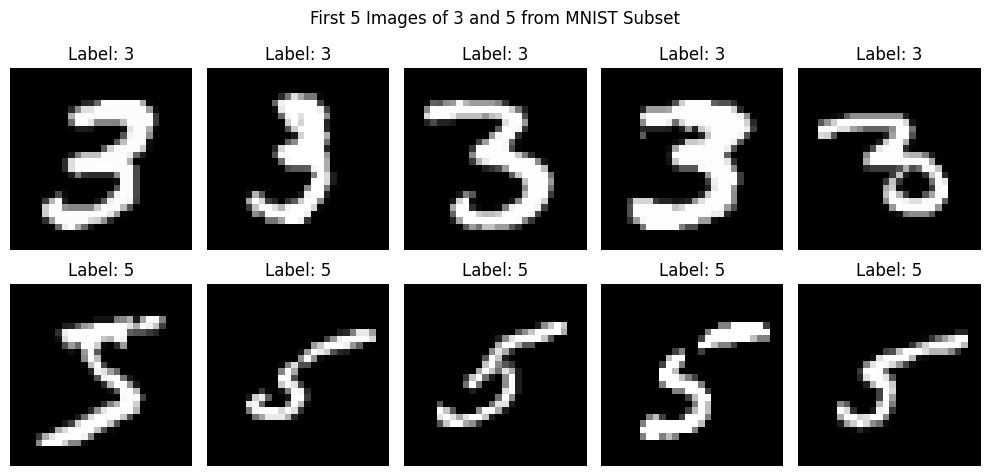

Correct Predictions in Final Epoch: 2616/2741
Total Misclassified Samples: 155


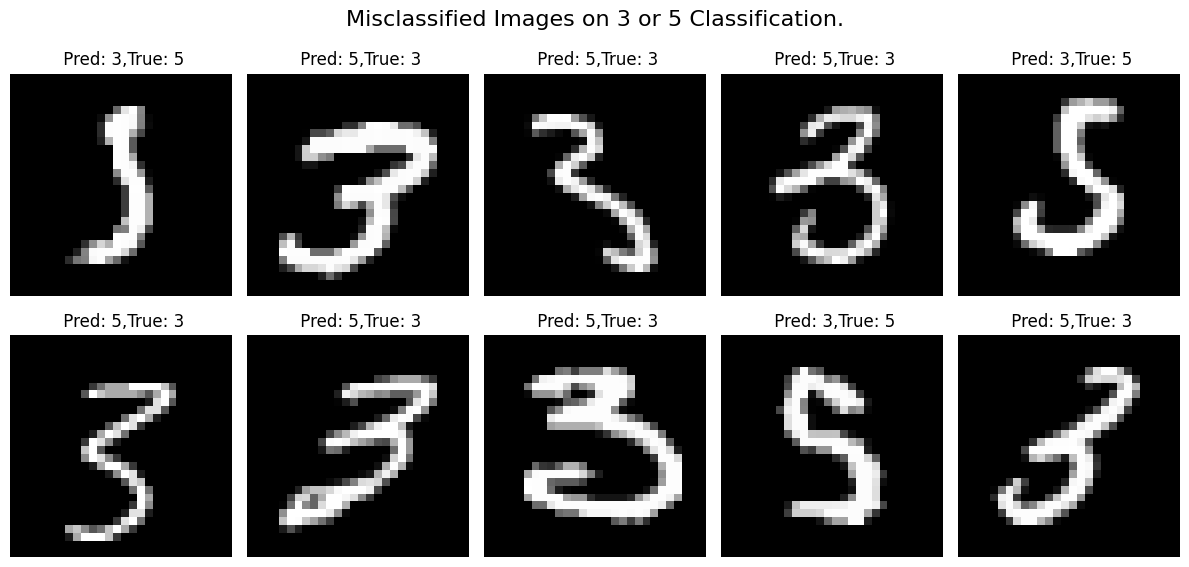

In [35]:
df = pd.read_csv("/content/mnist_3_and_5.csv")

df['label'] = df['label'].map({3: 0, 5: 1})

X = df.drop('label', axis=1).values  # shape: (n_samples, 784)
y = df['label'].values               # shape: (n_samples,)

print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

images_3 = X[y == 0]  # Originally digit 3
images_5 = X[y == 1]  # Originally digit 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_3 or images_5 to plot 5 images.")
else:
    for i in range(5):
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")

    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.tight_layout()
    plt.show()
np.random.seed(42)
weights = np.random.rand(X.shape[1])  # Random weights for 784 features
bias = 0.0
def decision_function(X, weights, bias):
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=10):
    accuracy = 0
    for _ in range(epochs):
        correct = 0
        for i in range(len(X)):
            prediction = np.dot(X[i], weights) + bias
            y_pred = 1 if prediction >= 0 else 0
            error = y[i] - y_pred
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
            if error == 0:
                correct += 1
        accuracy = correct
    return weights, bias, accuracy
weights, bias, accuracy = train_perceptron(X, y, weights, bias, epochs=10)
print(f"Correct Predictions in Final Epoch: {accuracy}/{len(X)}")
y_pred = decision_function(X, weights, bias)
misclassified_indices = np.where(y_pred != y)[0]
print(f"Total Misclassified Samples: {len(misclassified_indices)}")

plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indices[:10]):
    img = X[idx].reshape(28, 28)
    true_label = 3 if y[idx] == 0 else 5
    pred_label = 3 if y_pred[idx] ==0 else 5

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f' Pred: {pred_label},True: {true_label}')
    plt.axis('off')

plt.suptitle('Misclassified Images on 3 or 5 Classification.', fontsize=16)
plt.tight_layout()
plt.show()
